In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

データセットの読み込み

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 77 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          200000 non-null  int64 
 1   feature_0   200000 non-null  int64 
 2   feature_1   200000 non-null  int64 
 3   feature_2   200000 non-null  int64 
 4   feature_3   200000 non-null  int64 
 5   feature_4   200000 non-null  int64 
 6   feature_5   200000 non-null  int64 
 7   feature_6   200000 non-null  int64 
 8   feature_7   200000 non-null  int64 
 9   feature_8   200000 non-null  int64 
 10  feature_9   200000 non-null  int64 
 11  feature_10  200000 non-null  int64 
 12  feature_11  200000 non-null  int64 
 13  feature_12  200000 non-null  int64 
 14  feature_13  200000 non-null  int64 
 15  feature_14  200000 non-null  int64 
 16  feature_15  200000 non-null  int64 
 17  feature_16  200000 non-null  int64 
 18  feature_17  200000 non-null  int64 
 19  feature_18  200000 non-

In [4]:
data.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,99999.500000,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,...,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,57735.171256,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,...,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,49999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,99999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,149999.250000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.00000,...,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000
max,199999.000000,61.000000,51.000000,64.000000,70.000000,38.000000,76.000000,43.000000,30.000000,38.00000,...,54.000000,24.000000,79.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.00000,52.000000


In [5]:
data.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,...,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,...,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


In [6]:
data.tail()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
199995,199995,0,1,6,0,1,32,0,6,0,...,0,1,1,0,0,0,4,1,0,Class_6
199996,199996,0,2,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_6
199997,199997,1,2,0,0,0,2,0,1,8,...,1,0,1,1,1,0,1,0,0,Class_8
199998,199998,0,0,2,0,2,1,0,0,3,...,0,0,3,2,1,0,0,1,0,Class_7
199999,199999,5,4,0,10,0,1,0,0,12,...,0,0,2,1,0,0,2,3,1,Class_8


欠損値の確認

In [7]:
data.isnull().sum()
# data.isnull().any()


id            0
feature_0     0
feature_1     0
feature_2     0
feature_3     0
             ..
feature_71    0
feature_72    0
feature_73    0
feature_74    0
target        0
Length: 77, dtype: int64

In [8]:
## データ全体の中に欠損値が一つでもあればそれを示す
flag = False
for i in range(len(data.columns)):
    if data[data.columns[i]].isnull().any() == True:
        print(data[i] + 'have a missing value' )
        flag = True
if flag == False:
    print('There are no missing value')

There are no missing value


目標変数の確認

In [9]:
data["target"].unique()

array(['Class_6', 'Class_2', 'Class_8', 'Class_3', 'Class_1', 'Class_5',
       'Class_7', 'Class_9', 'Class_4'], dtype=object)

クラス1について確認してみる

In [10]:
data.query('target == "Class_1"')  

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
12,12,1,3,28,0,0,3,0,0,2,...,0,2,2,0,1,1,0,6,2,Class_1
54,54,0,0,0,1,0,2,2,0,0,...,2,0,0,0,0,0,0,0,0,Class_1
75,75,0,0,0,0,0,0,0,0,2,...,0,0,0,1,0,1,0,0,0,Class_1
89,89,2,7,5,0,0,6,0,0,0,...,0,0,1,1,1,0,1,1,0,Class_1
107,107,1,0,0,0,0,1,0,0,0,...,0,0,0,9,1,0,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199882,199882,0,1,17,1,0,0,0,0,1,...,3,1,0,0,5,3,16,0,0,Class_1
199884,199884,1,7,1,0,1,0,43,15,2,...,1,5,2,1,3,0,1,1,0,Class_1
199924,199924,1,0,0,3,0,0,0,0,8,...,0,2,0,2,0,0,0,0,0,Class_1
199950,199950,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0,Class_1


In [ ]:
data.query('target == "Class_1"').reset_index()  

In [11]:
# id列は実際には使わないからデータフレームから落とす
data1 = data.drop('id', axis=1)
data1.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,6,1,0,0,0,0,7,0,...,0,0,0,0,0,0,2,0,0,Class_6
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,Class_6
2,0,0,0,0,0,1,0,3,0,0,...,0,0,0,0,1,0,0,0,0,Class_2
3,0,0,7,0,1,5,2,2,0,1,...,0,4,0,2,2,0,4,3,0,Class_8
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_2


各変数と変数、または変数と目標変数の相関係数を調べたい

In [12]:
data_dummies = pd.get_dummies(data1)

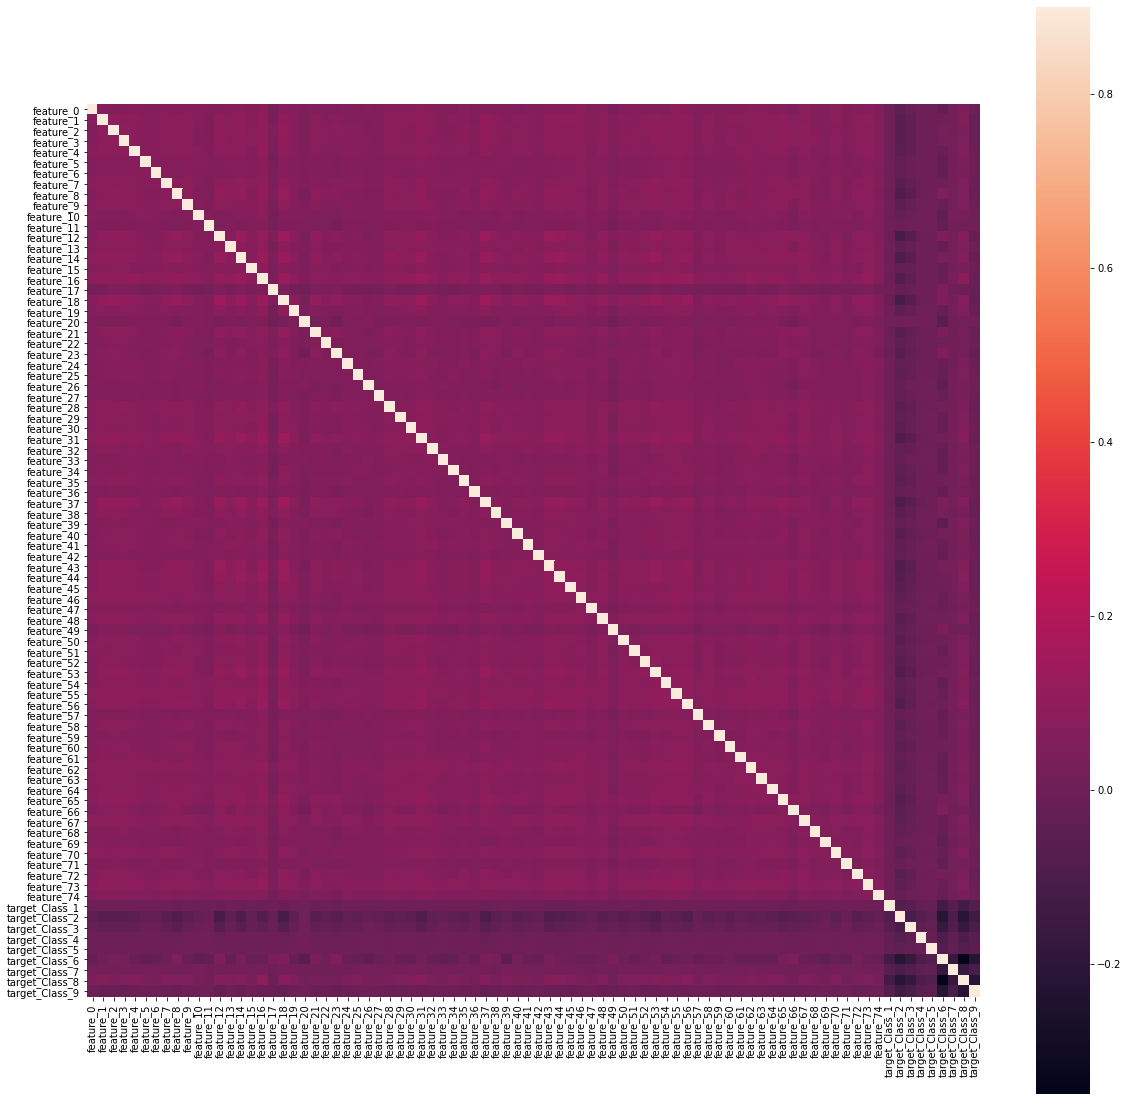

In [13]:
data_corr = data_dummies.corr
plt.subplots(figsize=(20, 20))
sns.heatmap(data_corr(), vmax= 0.9, square=True)

特徴量と各変数について特に強い相関関係はない模様...(かなり泣いてた)

targetとfeatureそれぞれの相関係数を抽出 各クラスと相関係数が高いものを抽出

In [14]:
def calc_corr(df):
    ## 相関係数行列を作成する関数(長方形です)
    corr_mat = df.corr(method='pearson')
    
    # 行(列)サイズを取得
    n =corr_mat.shape[0]
    
    # 項目名を取得
    columns = corr_mat.columns.tolist()
    
    # 変数名1、変数名2、値を一つの配列にいれたものを作成
    # 相関係数行列の下△部分だけ
    corr_ary = []
    var1_ary = []
    var2_ary = []
    for i in range(n):
        for j in range(i):
            if i==j :
                continue;
            corr_ary.append(corr_mat.iloc[i, j])
            var1_ary.append(columns[i])
            var2_ary.append(columns[j])
            
    # dfにする
    df_new = pd.DataFrame([])
    df_new["var1"] = var1_ary
    df_new["var2"] = var2_ary 
    df_new["corr"] = corr_ary
    
    return df_new

In [15]:
## 相関係数行列を作成、
data_dummies_corr = calc_corr(data_dummies)

In [16]:
## 相関係数が大きいものから順に並べている
df_new_corr = pd.DataFrame([])
df_new_corr = data_dummies_corr.sort_values(by = "corr", ascending = False, axis=0)
df_new_corr

,var1,var2,corr
684,feature_37,feature_18,0.144435
165,feature_18,feature_12,0.139406
483,feature_31,feature_18,0.136003
678,feature_37,feature_12,0.133761
167,feature_18,feature_14,0.133747
...,...,...,...
3397,target_Class_8,target_Class_2,-0.220434
3236,target_Class_6,target_Class_2,-0.220572
3485,target_Class_9,target_Class_8,-0.226107
3483,target_Class_9,target_Class_6,-0.226248


In [17]:
for j in range(9):
    a = str("df_new_corr_" + str(j+1))
            
for j in range(9):
    # 各Class1～9に対応したdict(featureと相関係数が中に入っている)を作成
    dict_corr_1 = {}
    for i in range(df_new_corr.shape[0]):
        if df_new_corr['var1'][i] == ('target_Class_'+ str(j+1)):
            dict_corr_1[df_new_corr['var2'][i]] = df_new_corr['corr'][i]
    # 相関係数が大きいものから順に辞書を降順ソート
    dict_corr_1 = sorted(dict_corr_1.items(), key=lambda x:x[1],  reverse=True)
    print('now we see correlation between target_Class_' + str(j+1) + ' and features')
    for k in range(20):
        print(dict_corr_1[k])
    
    print('-------------------------------------------------------------------------------------------------')

now we see correlation between target_Class_1 and features
('feature_20', 0.008789657375674026)
('feature_39', 0.008162400696386045)
('feature_11', 0.006668368562196995)
('feature_59', 0.006493434541562934)
('feature_69', 0.006459816224272499)
('feature_5', 0.005971608798444492)
('feature_33', 0.0056806710982583416)
('feature_74', 0.005669174576176932)
('feature_41', 0.00554823857825649)
('feature_15', 0.004873577305183979)
('feature_25', 0.004813234336476144)
('feature_60', 0.004332254019434891)
('feature_51', 0.004302897648314279)
('feature_29', 0.0042982090238638995)
('feature_4', 0.004070906636566032)
('feature_42', 0.0038881774148631014)
('feature_47', 0.003608897287436142)
('feature_27', 0.003509483595937786)
('feature_32', 0.003456128979645732)
('feature_26', 0.0031480469136605837)
-------------------------------------------------------------------------------------------------
now we see correlation between target_Class_2 and features
('feature_20', 0.0076726780298389105)
('fea

棒グラフで各特徴量の個数を導出
特徴量の個数が75個もあるのでそれぞれの値を入力として、Class_1～9と特徴量の関係を可視化

10


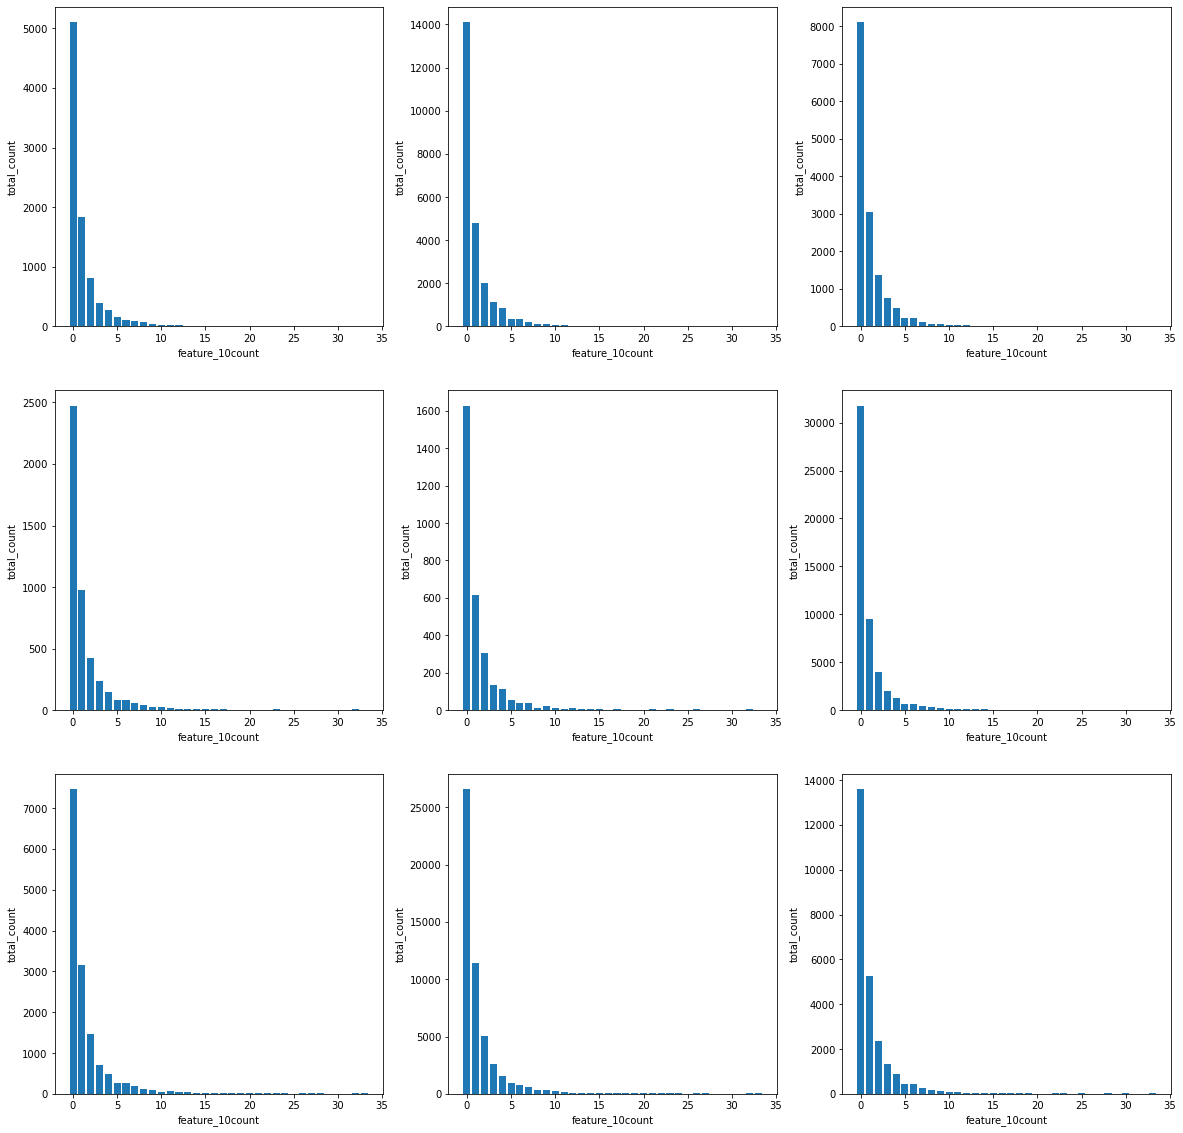

In [18]:
k = input()
## feature_0～74とtargetを列に持つデータフレームを作成
df_feature_1 = pd.DataFrame([])
df_feature_1['feature_'+str(k)] = data['feature_'+str(k)]
df_feature_1['target'] = data['target']

fig = plt.figure(figsize=(20, 20)) 
## targetごとにグラフを描画する
for i in range(len(df_feature_1['target'].unique())):
    df_feature_i = df_feature_1[df_feature_1['target'] == 'Class_'+str(i+1)]
    feature_1_i = df_feature_i['feature_' + str(k)].unique().tolist()    
    feature_1_i = sorted(feature_1_i)
    count1_i = [0]*len(feature_1_i)
    for j in range(len(feature_1_i)):
        count1_i[j] = df_feature_i[df_feature_i['feature_'+str(k)] == feature_1_i[j]].count()["feature_"+ str(k)]    
    left = np.array(feature_1_i)        
    height = np.array(count1_i)
    ax = fig.add_subplot(3, 3, i+1, xlabel = "feature_" + str(k) + "count", ylabel = "total_count")
    ax.bar(left, height, width=0.8)

特徴量を把握するにあたって、0が邪魔になっているため削除する

10
89182
89182
89182
89182
89182
89182
89182
89182
89182


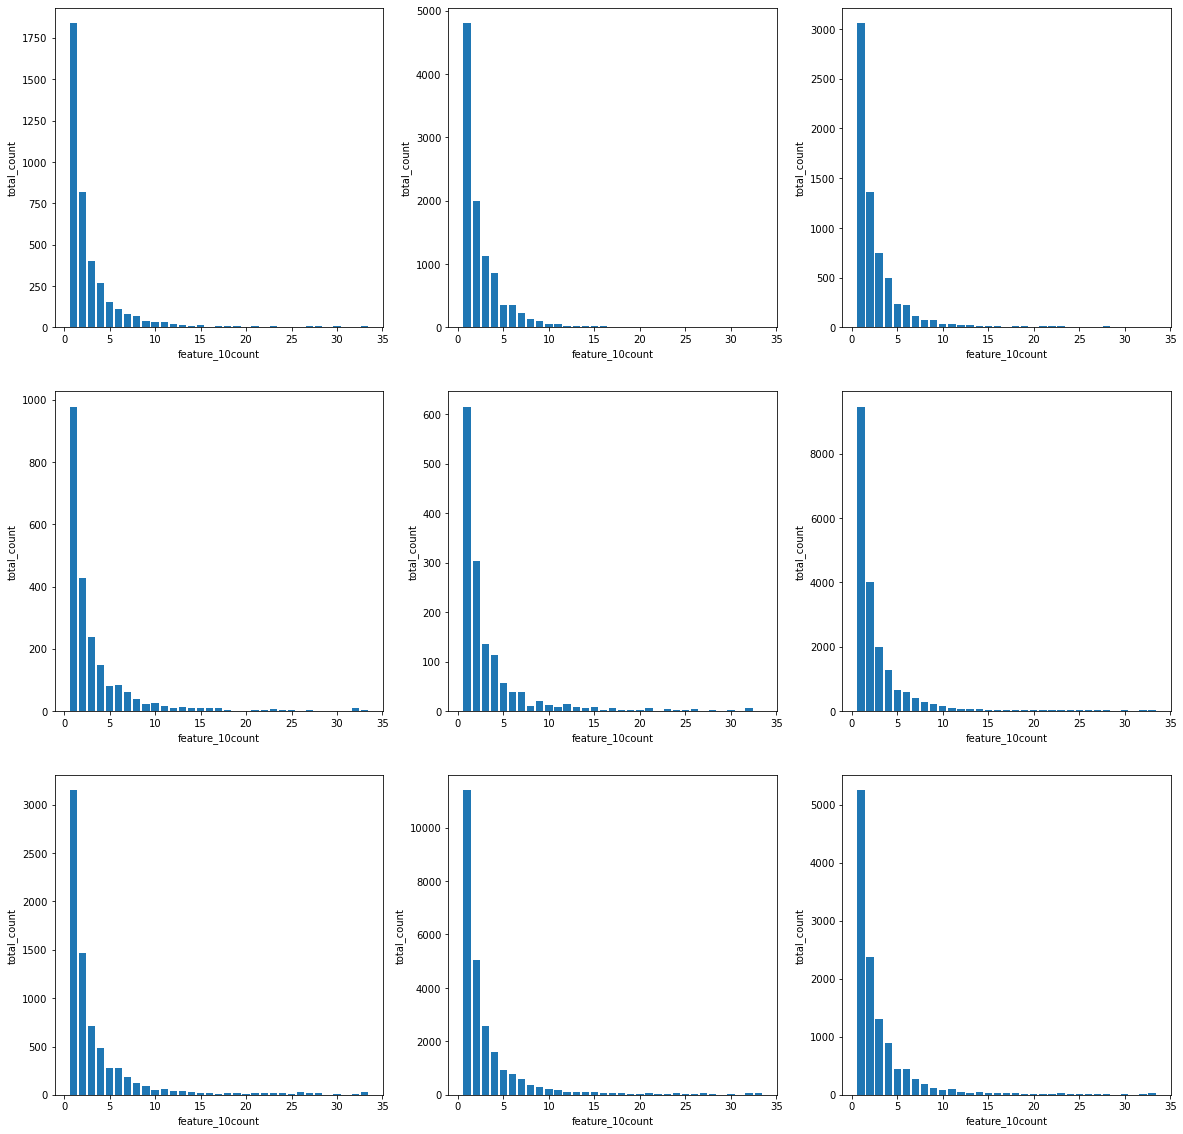

In [19]:
k = input()
## feature_0～74とtargetを列に持つデータフレームを作成
df_feature_1 = pd.DataFrame([])
df_feature_1['feature_'+str(k)] = data['feature_'+str(k)]
df_feature_1['target'] = data['target']
## 0が含まれる行を削除する
df_feature_1 = df_feature_1[df_feature_1['feature_' + str(k)] != 0]

fig = plt.figure(figsize=(20, 20)) 
# targetごとにグラフを描画する
for i in range(len(df_feature_1['target'].unique())):
    print(len(df_feature_1))
    df_feature_i = df_feature_1[df_feature_1['target'] == 'Class_'+str(i+1)]
    feature_1_i = df_feature_i['feature_' + str(k)].unique().tolist()    
    feature_1_i = sorted(feature_1_i)
    count1_i = [0]*len(feature_1_i)
    for j in range(len(feature_1_i)):
        count1_i[j] = df_feature_i[df_feature_i['feature_'+str(k)] == feature_1_i[j]].count()["feature_"+ str(k)]    
    left = np.array(feature_1_i)        
    height = np.array(count1_i)
    ax = fig.add_subplot(3, 3, i+1, xlabel = "feature_" + str(k) + "count", ylabel = "total_count")
    ax.bar(left, height, width=0.8)

特徴量からどうClassに分類するかさっぱりわからず...
とりあえずランダムフォレストと決定木に値を渡してみることに

feature0～74まで標準化を施す


In [20]:
def normalize(df):
    result = (df-df.min()) / (df.max() - df.min())
    return result

In [21]:
data = data.drop('id', axis=1)
for i in range(data.shape[1]-2):
    data['feature_' + str(i)] = normalize(data['feature_' + str(i)])

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.3)
X_train.shape , X_test.shape

x_train = X_train.drop('target', axis=1)
y_train = X_train['target']
x_test = X_test.drop('target', axis=1)
y_test = X_test['target']

決定木


In [34]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.94

In [36]:
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

23.28

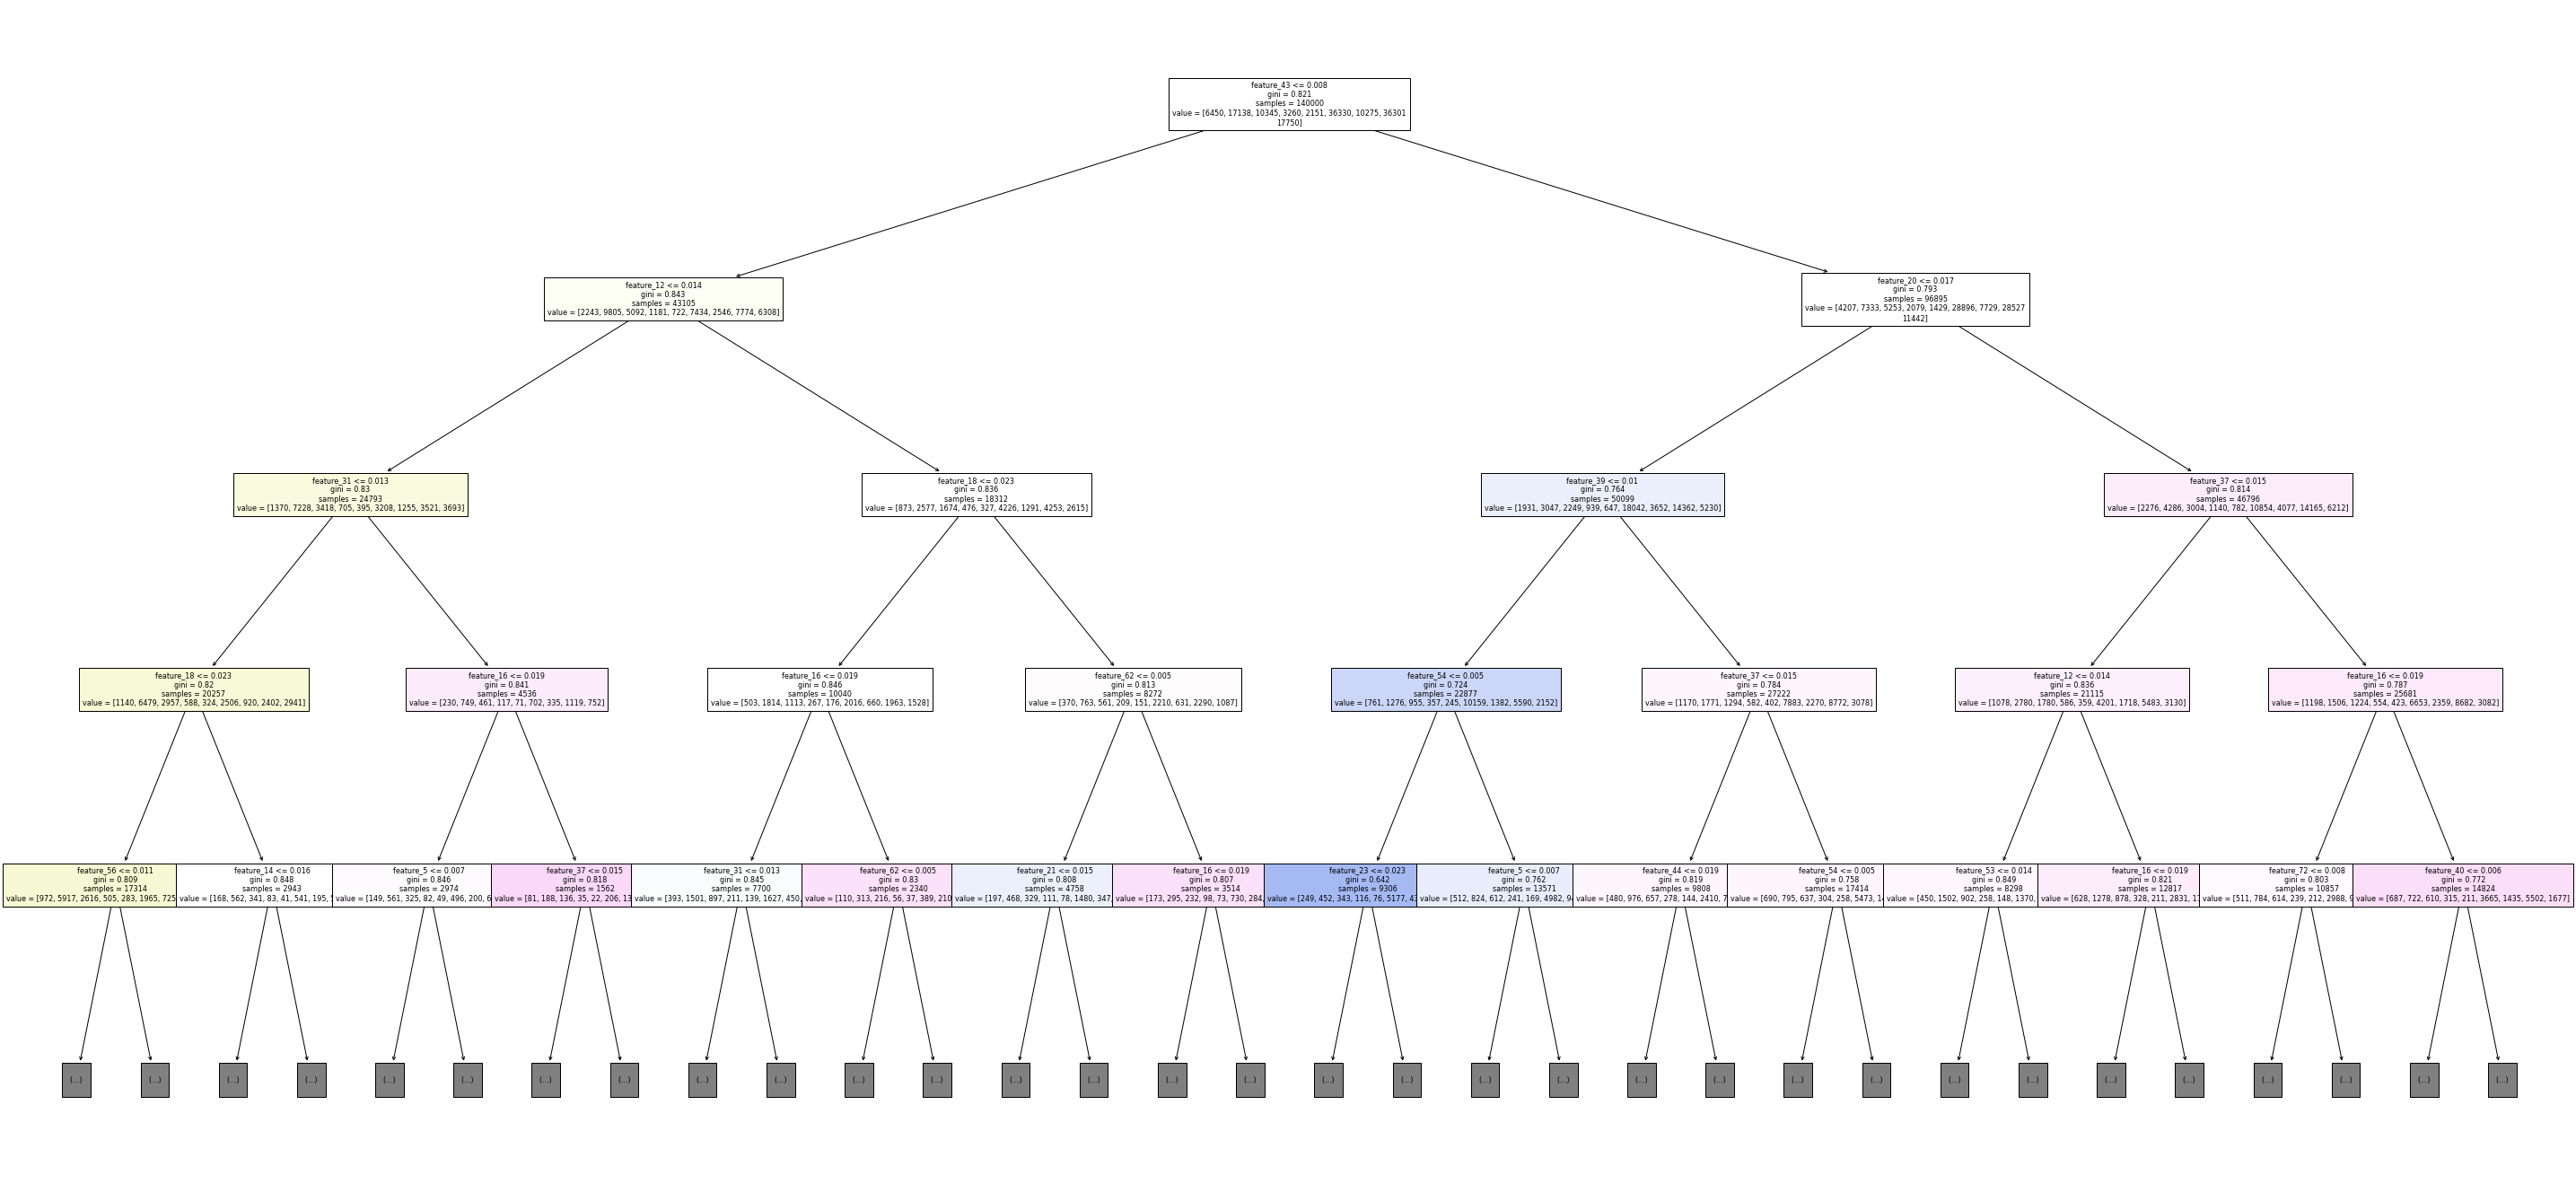

In [56]:
from sklearn.tree import plot_tree
features = data.columns[:75]
plt.figure(figsize=(50, 24))
plot_tree(decision_tree, feature_names=features, max_depth=4, fontsize=8, filled=True)
plt.savefig('tree_high_dpi', dpi=100) # ディレクトリに保存される
plt.show()

ランダムフォレスト

In [23]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.94

In [24]:
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
acc_random_forest

34.94

In [30]:
from sklearn import tree
import pydotplus as pdp
features = data.columns[:75]
estimators = random_forest.estimators_
dot_data = tree.export_graphviz(estimators[10], # 決定木オブジェクトを一つ指定する
                                out_file=None,                                
                                max_depth = None,
                                rounded=True, # Trueにすると、ノードの角を丸く描画する。
                                feature_names=features, # これを指定しないとチャート上で特徴量の名前が表示されない
                                class_names=data.target, # これを指定しないとチャート上で分類名が表示されない
                                special_characters=True  # 特殊文字を扱えるようにする
                                
                                )
graph = pdp.graph_from_dot_data(dot_data)
graph
